In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("reduced_sales_dataset.csv")
df

,Name,advertising,Social_Media_Spend,Email_Campaign_Spend,Store_Visits,Sales
0,XOAPQ,4181.440303,5745.071230,3926.177548,2699.677718,17335.08323
1,OHDEX,4130.907492,4792.603548,4909.416640,2462.316841,13346.44285
2,RUWIS,4776.727948,23886.131230,1601.432426,6089.445555,62727.01675
3,PIFNR,4359.699436,7284.544785,3562.969237,1676.531611,14989.87663
4,EBAPE,1794.819689,4648.769938,2349.357431,2349.111657,14489.44613
...,...,...,...,...,...,...
95,QBNYG,4802.401655,2804.727578,2489.983601,1959.641710,11970.80789
96,FVTDD,4055.349620,5444.180416,2730.125065,2039.317595,16857.46278
97,MMQFN,1702.373397,5391.582908,2021.236284,1000.899658,21172.48641
98,LAQWI,1016.989327,5007.670185,NaN,2458.163837,15062.38112


In [4]:
# Step 2: Handle missing values (numeric only)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
df

,Name,advertising,Social_Media_Spend,Email_Campaign_Spend,Store_Visits,Sales
0,XOAPQ,4181.440303,5745.071230,3926.177548,2699.677718,17335.08323
1,OHDEX,4130.907492,4792.603548,4909.416640,2462.316841,13346.44285
2,RUWIS,4776.727948,23886.131230,1601.432426,6089.445555,62727.01675
3,PIFNR,4359.699436,7284.544785,3562.969237,1676.531611,14989.87663
4,EBAPE,1794.819689,4648.769938,2349.357431,2349.111657,14489.44613
...,...,...,...,...,...,...
95,QBNYG,4802.401655,2804.727578,2489.983601,1959.641710,11970.80789
96,FVTDD,4055.349620,5444.180416,2730.125065,2039.317595,16857.46278
97,MMQFN,1702.373397,5391.582908,2021.236284,1000.899658,21172.48641
98,LAQWI,1016.989327,5007.670185,2860.430981,2458.163837,15062.38112


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("reduced_sales_dataset.csv")

def remove_outliers_iqr(df, cols):
    filtered_df = df.copy()
    for col in cols:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Only keep rows within bounds for this column
        filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]
    return filtered_df

# Example usage:
numeric_cols = ['Social_Media_Spend', 'Email_Campaign_Spend', 'Store_Visits', 'Sales']
df = remove_outliers_iqr(df, numeric_cols)


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("reduced_sales_dataset.csv")
df = df.drop(columns=['Name'])
df = df[['advertising', 'Sales']].dropna()
df

,advertising,Sales
0,4181.440303,17335.08323
1,4130.907492,13346.44285
2,4776.727948,62727.01675
3,4359.699436,14989.87663
4,1794.819689,14489.44613
...,...,...
95,4802.401655,11970.80789
96,4055.349620,16857.46278
97,1702.373397,21172.48641
98,1016.989327,15062.38112


In [14]:
x = df['advertising'].values
y = df['Sales'].values


array([17335.08323 , 13346.44285 , 62727.01675 , 14989.87663 ,
       14489.44613 , 13640.31585 , 17089.16234 , 17865.91563 ,
       15265.22066 , 19432.59024 , 11574.93266 , 12849.53304 ,
        9400.390149, 14751.95794 , 14634.75747 , 19540.34923 ,
       16892.43505 , 59637.19764 , 20562.2777  , 18663.10109 ,
       16746.29311 , 14320.5477  , 12121.68229 , 13883.37967 ,
       18266.24586 , 20653.75892 , 19629.73058 , 13533.45173 ,
       11641.1477  , 15422.65874 ,  9694.681903, 15969.50314 ,
       14557.19224 , 13601.89049 , 10215.8908  , 16540.80032 ,
       13401.89748 , 11490.24949 ,  6383.21336 , 14917.45528 ,
       20316.75479 , 19983.77764 , 13628.71123 , 16406.32277 ,
       12004.84368 , 15905.3757  , 17298.24084 , 18680.79967 ,
       14699.53777 , 14388.97875 , 12366.05224 , 12519.35894 ,
       14320.56332 , 16102.09652 , 17740.75388 , 12590.46315 ,
       19478.06571 , 14186.6292  , 14935.89812 , 12758.36496 ,
        7727.279219, 17652.13619 , 17210.53169 , 14156.

In [16]:

x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean 
y_mean


np.float64(16362.747633649482)

In [18]:
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

m = numerator / denominator
c = y_mean - m * x_mean
m
c

np.float64(15094.331170193767)

In [20]:
y_pred = m * x + c
y_pred

array([16793.99293921, 16773.45248403, 17035.96402555, 16866.4512818 ,
       15823.88514832, 16578.75869152, 16615.82799164, 15525.18115767,
       17061.99840038, 16593.85566943, 15712.48415728, 16116.54021097,
       16739.76668149, 16070.332693  , 16958.05459181, 15704.42974016,
       15745.5419401 , 15633.3001568 , 17094.83141553, 16002.58198354,
       16407.07206296, 15807.00628064, 17034.28654182, 16546.47158895,
       15506.17216822, 16771.41888298, 17018.55334118, 15822.69838121,
       16590.20168537, 15861.5560334 , 16690.77080944, 16618.80962886,
       15767.54141542, 16042.3921181 , 16069.83426116, 16514.16473813,
       16519.1054103 , 15614.58096234, 15554.60331689, 16202.48283595,
       16840.56189333, 16452.29414223, 16250.34645443, 16615.43521599,
       16196.21797301, 16168.2019392 , 16412.42140154, 16382.38217195,
       15684.43700521, 16284.05971556, 15739.68474004, 16104.07121813,
       17124.14702632, 15615.56046084, 16955.31830203, 16749.18767338,
      

In [21]:
print("Slope (m):", m)
print("Intercept (c):", c)
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared Score:", r2_score(y, y_pred))

Slope (m): 0.40647758808762685
Intercept (c): 15094.331170193767
Mean Squared Error: 97088188.9165548
R-squared Score: 0.002393874459492018


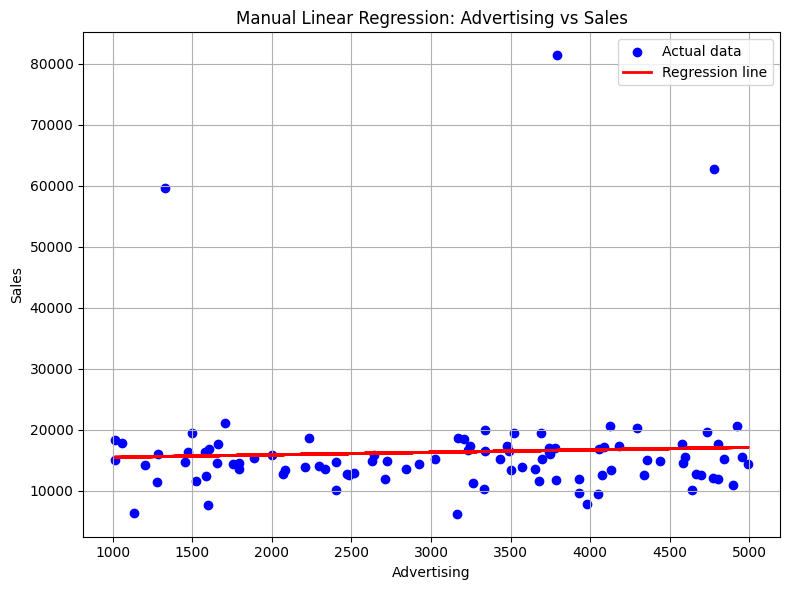

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Manual Linear Regression: Advertising vs Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()